# Local Outlier Factor Anomaly Detection implementation :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Create a concentric circle dataset:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=500, factor=.5, noise=.07, random_state=4)

In [13]:
#X

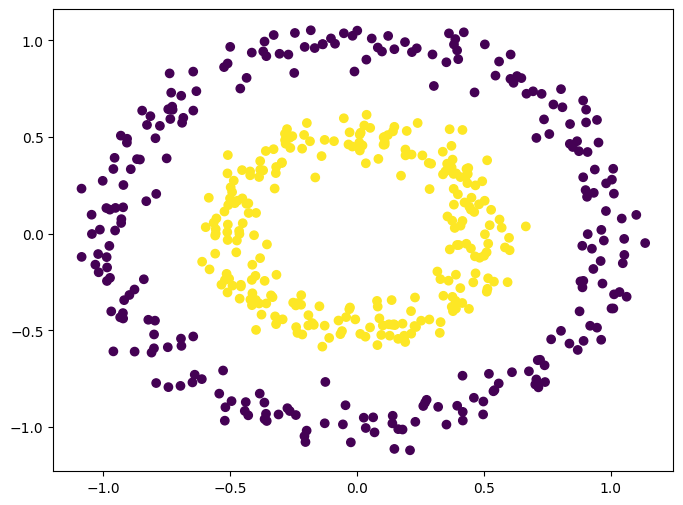

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker='o',c=_)
plt.show()

## introducing outliers:
- e.g., points far from the circle

In [21]:
num_outliers = 10
outliers = np.random.uniform(low=-2, high=2, size=(num_outliers, 2))  # Generate random points

#Combine original data with outliers
X_outlier = np.vstack([X, outliers])

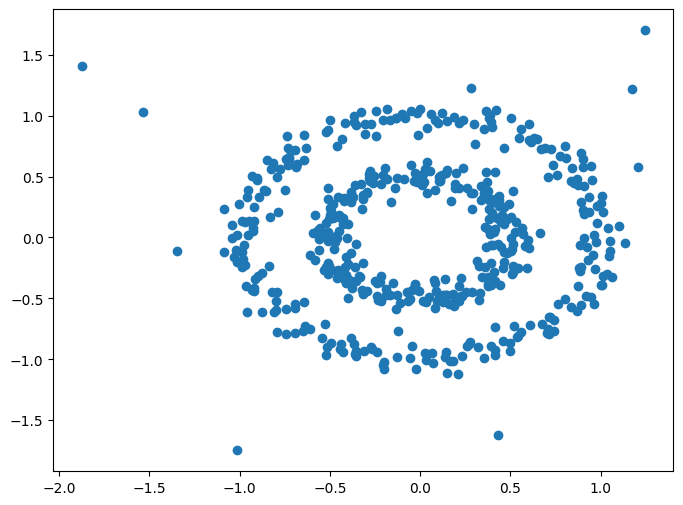

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_outlier[:,0],X_outlier[:,1],marker='o')
plt.show()

## Apply Local Outlier Factor:

In [24]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)  # Adjust contamination level
y_pred = lof.fit_predict(X_outlier)

In [25]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

## Visualization :

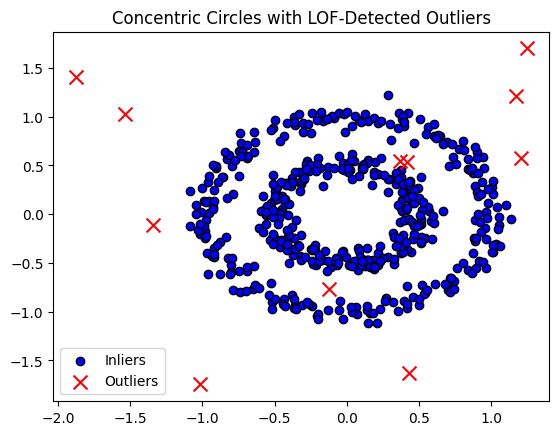

In [26]:
# Identify outliers based on LOF prediction
outlier_points = X_outlier[y_pred == -1]  # LOF labels outliers as -1
inlier_points = X_outlier[y_pred == 1]   # LOF labels inliers as 1

# Plot all points, coloring outliers separately
plt.scatter(inlier_points[:, 0], inlier_points[:, 1], c='blue', edgecolors='k', label="Inliers")
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', marker='x', s=100, label="Outliers")

plt.title("Concentric Circles with LOF-Detected Outliers")
plt.legend()
plt.show()
